In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
match=pd.read_csv("matches.csv")
delivery=pd.read_csv("deliveries.csv")

In [3]:
match.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [4]:
match.columns = ['id', 'city', 'date','season','matchnumber' ,'team1', 'team2','venue', 'toss_winner',
       'toss_decision', 'superover', 'winner', 'wonby','margin','dl_applied',
       'player_of_match','team1players','tean2players' ,'umpire1', 'umpire2']

In [5]:
delivery.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [6]:
delivery.columns=['match_id','inning','over','ball','batsman','bowler','non_striker','extra_type','batsman_runs','extra_runs','total_runs',
                'non_boundary','iswicketdelivery','player_dismissed','dismissal_kind','fielder','batting_team']

In [7]:
total_score_df=delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [8]:
total_score_df

,match_id,inning,total_runs
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
1923,1312198,2,193
1924,1312199,1,157
1925,1312199,2,161
1926,1312200,1,130


In [9]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [10]:
total_score_df

,match_id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
1918,1304116,1,157
1920,1312197,1,188
1922,1312198,1,207
1924,1312199,1,157


In [11]:
# we have merge the total_run column in match_df  

match_df=match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [12]:
match_df

,id,city,date,season,matchnumber,team1,team2,venue,toss_winner,toss_decision,...,wonby,margin,dl_applied,player_of_match,team1players,tean2players,umpire1,umpire2,match_id,total_runs
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,1312200,130
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,1312199,157
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,1312198,207
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,1312197,188
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,1304116,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,...,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan,335986,110
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,...,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper,335985,165
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,...,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar,335984,129
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,...,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri,335983,240


In [13]:
match_df['team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [14]:
# we want only 10 teams which are playing in 2020

teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Punjab Kings',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals',
    'Gujarat Titans',
    'Lucknow Super Giants'
]

In [15]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['team1'] = match_df['team1'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['team2'] = match_df['team2'].str.replace('Kings XI Punjab','Punjab Kings')

In [16]:
# we only want the dataframe of 10 teams which are playing in IPL currently

match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [17]:
match_df = match_df[match_df['dl_applied'].isna()]

In [18]:
match_df

,id,city,date,season,matchnumber,team1,team2,venue,toss_winner,toss_decision,...,wonby,margin,dl_applied,player_of_match,team1players,tean2players,umpire1,umpire2,match_id,total_runs
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,1312200,130
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,1312199,157
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,1312198,207
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,1312197,188
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,1304116,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Sunrisers Hyderabad,Eden Gardens,Deccan Chargers,bat,...,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan,335986,110
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,...,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper,335985,165
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Capitals,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,...,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar,335984,129
948,335983,Chandigarh,2008-04-19,2007/08,2,Punjab Kings,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,...,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri,335983,240


In [19]:
# we want only this 4 column for our model prediction

match_df = match_df[['match_id','city','winner','total_runs']]

In [20]:
match_df

,match_id,city,winner,total_runs
0,1312200,Ahmedabad,Gujarat Titans,130
1,1312199,Ahmedabad,Rajasthan Royals,157
2,1312198,Kolkata,Royal Challengers Bangalore,207
3,1312197,Kolkata,Gujarat Titans,188
4,1304116,Mumbai,Punjab Kings,157
...,...,...,...,...
945,335986,Kolkata,Kolkata Knight Riders,110
946,335985,Mumbai,Royal Challengers Bangalore,165
947,335984,Delhi,Delhi Daredevils,129
948,335983,Chandigarh,Chennai Super Kings,240


In [21]:
delivery_df = match_df.merge(delivery,on='match_id')

In [22]:
# we want only second inning score for our win prediction

delivery_df = delivery_df[delivery_df['inning'] == 2]

In [23]:
delivery_df

,match_id,city,winner,total_runs_x,inning,over,ball,batsman,bowler,non_striker,extra_type,batsman_runs,extra_runs,total_runs_y,non_boundary,iswicketdelivery,player_dismissed,dismissal_kind,fielder,batting_team
120,1312200,Ahmedabad,Gujarat Titans,130,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
121,1312200,Ahmedabad,Gujarat Titans,130,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
122,1312200,Ahmedabad,Gujarat Titans,130,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans
123,1312200,Ahmedabad,Gujarat Titans,130,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
124,1312200,Ahmedabad,Gujarat Titans,130,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196449,335982,Bangalore,Kolkata Knight Riders,222,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
196450,335982,Bangalore,Kolkata Knight Riders,222,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
196451,335982,Bangalore,Kolkata Knight Riders,222,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
196452,335982,Bangalore,Kolkata Knight Riders,222,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [24]:
# we use groupby function for cumulative runs per ball and stored into [current_score] column

delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']

In [25]:
delivery_df

,match_id,city,winner,total_runs_x,inning,over,ball,batsman,bowler,non_striker,...,batsman_runs,extra_runs,total_runs_y,non_boundary,iswicketdelivery,player_dismissed,dismissal_kind,fielder,batting_team,current_score
120,1312200,Ahmedabad,Gujarat Titans,130,2,0,1,WP Saha,TA Boult,Shubman Gill,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0
121,1312200,Ahmedabad,Gujarat Titans,130,2,0,2,WP Saha,TA Boult,Shubman Gill,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0
122,1312200,Ahmedabad,Gujarat Titans,130,2,0,3,WP Saha,TA Boult,Shubman Gill,...,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1
123,1312200,Ahmedabad,Gujarat Titans,130,2,0,4,Shubman Gill,TA Boult,WP Saha,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1
124,1312200,Ahmedabad,Gujarat Titans,130,2,0,5,Shubman Gill,TA Boult,WP Saha,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196449,335982,Bangalore,Kolkata Knight Riders,222,2,14,5,P Kumar,I Sharma,SB Joshi,...,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,80
196450,335982,Bangalore,Kolkata Knight Riders,222,2,14,6,SB Joshi,I Sharma,P Kumar,...,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81
196451,335982,Bangalore,Kolkata Knight Riders,222,2,14,7,P Kumar,I Sharma,SB Joshi,...,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81
196452,335982,Bangalore,Kolkata Knight Riders,222,2,15,1,SB Joshi,LR Shukla,P Kumar,...,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,82


In [26]:
# similary we want how many balls and runs left after some over or balls bowled in 2nd inning.

delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [27]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [28]:
delivery_df

,match_id,city,winner,total_runs_x,inning,over,ball,batsman,bowler,non_striker,...,total_runs_y,non_boundary,iswicketdelivery,player_dismissed,dismissal_kind,fielder,batting_team,current_score,runs_left,balls_left
120,1312200,Ahmedabad,Gujarat Titans,130,2,0,1,WP Saha,TA Boult,Shubman Gill,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,130,125
121,1312200,Ahmedabad,Gujarat Titans,130,2,0,2,WP Saha,TA Boult,Shubman Gill,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,130,124
122,1312200,Ahmedabad,Gujarat Titans,130,2,0,3,WP Saha,TA Boult,Shubman Gill,...,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,129,123
123,1312200,Ahmedabad,Gujarat Titans,130,2,0,4,Shubman Gill,TA Boult,WP Saha,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,129,122
124,1312200,Ahmedabad,Gujarat Titans,130,2,0,5,Shubman Gill,TA Boult,WP Saha,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,129,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196449,335982,Bangalore,Kolkata Knight Riders,222,2,14,5,P Kumar,I Sharma,SB Joshi,...,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,80,142,37
196450,335982,Bangalore,Kolkata Knight Riders,222,2,14,6,SB Joshi,I Sharma,P Kumar,...,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81,141,36
196451,335982,Bangalore,Kolkata Knight Riders,222,2,14,7,P Kumar,I Sharma,SB Joshi,...,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81,141,35
196452,335982,Bangalore,Kolkata Knight Riders,222,2,15,1,SB Joshi,LR Shukla,P Kumar,...,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,82,140,35


In [29]:
# This will calculate how many wicket left in inning

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets_left'] = 10 - wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,over,ball,batsman,bowler,non_striker,...,non_boundary,iswicketdelivery,player_dismissed,dismissal_kind,fielder,batting_team,current_score,runs_left,balls_left,wickets_left
120,1312200,Ahmedabad,Gujarat Titans,130,2,0,1,WP Saha,TA Boult,Shubman Gill,...,0,0,0,NaN,NaN,Gujarat Titans,0,130,125,10
121,1312200,Ahmedabad,Gujarat Titans,130,2,0,2,WP Saha,TA Boult,Shubman Gill,...,0,0,0,NaN,NaN,Gujarat Titans,0,130,124,10
122,1312200,Ahmedabad,Gujarat Titans,130,2,0,3,WP Saha,TA Boult,Shubman Gill,...,0,0,0,NaN,NaN,Gujarat Titans,1,129,123,10
123,1312200,Ahmedabad,Gujarat Titans,130,2,0,4,Shubman Gill,TA Boult,WP Saha,...,0,0,0,NaN,NaN,Gujarat Titans,1,129,122,10
124,1312200,Ahmedabad,Gujarat Titans,130,2,0,5,Shubman Gill,TA Boult,WP Saha,...,0,0,0,NaN,NaN,Gujarat Titans,1,129,121,10


In [30]:
delivery_df=delivery_df[delivery_df['balls_left'] != 0]

In [31]:
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [32]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [33]:
# If chasing team wins then return 1 or lose return 0

def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [34]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [35]:
final_df = delivery_df[['batting_team','city','runs_left','balls_left','wickets_left','total_runs_x','rrr','result']]

In [36]:
delivery.columns

Index(['match_id', 'inning', 'over', 'ball', 'batsman', 'bowler',
       'non_striker', 'extra_type', 'batsman_runs', 'extra_runs', 'total_runs',
       'non_boundary', 'iswicketdelivery', 'player_dismissed',
       'dismissal_kind', 'fielder', 'batting_team'],
      dtype='object')

In [37]:
# we have to suffle the dataset because if we aren't suffle it then it wiii be baised towards particular team or match

final_df = final_df.sample(final_df.shape[0])

In [38]:
final_df

,batting_team,city,runs_left,balls_left,wickets_left,total_runs_x,rrr,result
27420,Kolkata Knight Riders,Ahmedabad,35,54,6,123,3.888889,1
91771,Delhi Daredevils,Raipur,69,82,8,119,5.048780,1
116403,Kings XI Punjab,Abu Dhabi,61,45,7,205,8.133333,1
166697,Delhi Daredevils,Cuttack,139,109,10,171,7.651376,0
16363,Lucknow Super Giants,Mumbai,139,81,10,210,10.296296,1
...,...,...,...,...,...,...,...,...
3108,Gujarat Titans,Mumbai,60,76,9,133,4.736842,1
124373,Royal Challengers Bangalore,Mumbai,159,92,10,194,10.369565,0
174035,Royal Challengers Bangalore,Durban,66,60,7,129,6.600000,1
26882,Chennai Super Kings,Delhi,151,110,10,171,8.236364,1


In [39]:
final_df.dropna(inplace=True)

In [40]:
final_df = final_df[final_df['balls_left'] != 0]

In [41]:
final_df=final_df[final_df['wickets_left'] != 0]

In [42]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','city'])
]
,remainder='passthrough')

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [45]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [46]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [47]:
y_pred = pipe.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8139116754691539

In [49]:
pipe.predict_proba(X_test)[10]

array([0.30826383, 0.69173617])

In [54]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier())
])

In [55]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team', 'city'])])),
                ('step2', RandomForestClassifier())])

In [56]:
# It shows that RandomForestClassifier gives better accuracy than LogisticRegression but RFC is not good for giving 
#  probability of winning percentage it will baised towards particular team so we chosse Logestic Regression for 
# probability prediction.  
  
y_pred = pipe.predict(X_test)
accuracy_score(y_test,y_pred)

0.9957298572873357

In [57]:
pipe.predict_proba(X_test)[10]

array([0.03, 0.97])

In [50]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','city','runs_left','balls_left','wickets_left','total_runs_x','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [51]:
temp_df,target = match_progression(delivery_df,335982,pipe)
temp_df

Target- 222


,end_of_over,runs_after_over,wickets_in_over,lose,win
196358,1,4,0,87.7,12.3
196365,2,5,1,93.1,6.9
196371,3,2,1,96.8,3.2
196378,4,5,0,97.1,2.9
196384,5,8,1,98.3,1.7
196390,6,2,1,99.3,0.7
196396,7,3,0,99.5,0.5
196404,8,9,1,99.7,0.3
196410,9,3,1,99.9,0.1
196418,10,9,1,99.9,0.1


In [52]:
temp_df,target = match_progression(delivery_df,335985,pipe)
temp_df

Target- 165


,end_of_over,runs_after_over,wickets_in_over,lose,win
195644,1,10,0,41.8,58.2
195650,2,1,0,46.2,53.8
195656,3,11,0,38.6,61.4
195662,4,5,0,38.5,61.5
195668,5,10,0,32.5,67.5
195675,6,3,1,49.4,50.6
195681,7,6,0,48.6,51.4
195687,8,8,0,45.0,55.0
195693,9,14,1,46.7,53.3
195700,10,8,1,57.4,42.6


Text(0.5, 1.0, 'Target-165')

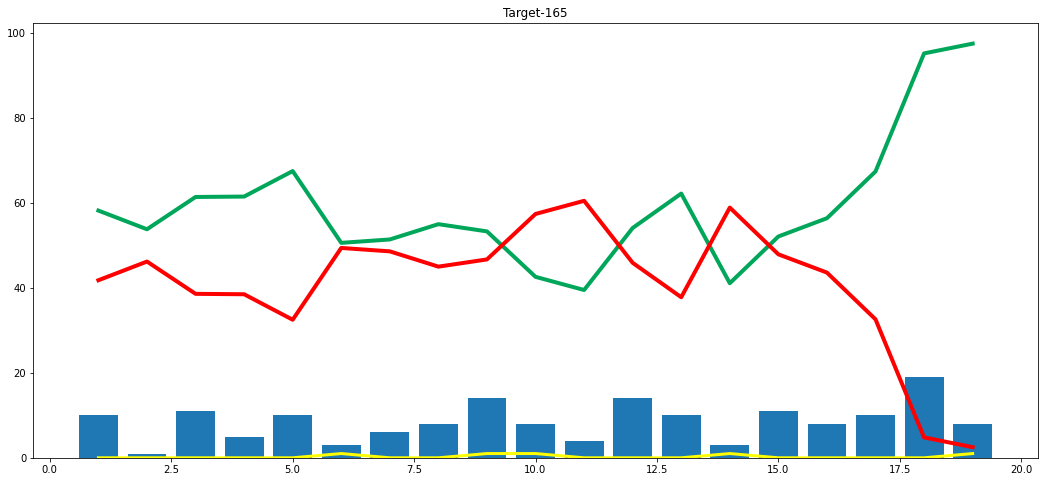

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))